In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('olimpic_medals.csv')

In [62]:
# 1) Сколько медалей выиграл Jesse Owens в 1936?

dataframe = df[(df.Athlete == 'OWENS, Jesse') & (df.Edition == 1936)].shape[0]
print(f'В 1936 Jesse Owens выиграл {dataframe} медали')

В 1936 Jesse Owens выиграл 4 медали


In [63]:
# 2) Какая страна выиграла большинство золотых медалей мужчинами в бадминтоне?

dataframe = df[(df.Event_gender == 'M') & (df.Sport == 'Badminton') & (df.Medal == 'Gold')].value_counts('NOC')
print(f'{dataframe.index[0]} выиграла большинство золотых медалей среди мужчин в бадминтоне')

INA выиграла большинство золотых медалей среди мужчин в бадминтоне


In [73]:
# 3) Какие три страны выиграли большинство медалей в последние годы (с 1984 по 2008)?

dataframe = df[(df.Edition >= 1984)].value_counts('NOC')
print(f'{dataframe.index[0]}, {dataframe.index[1]} и {dataframe.index[2]} выиграли \
большинство медалей в последние годы (с 1984 по 2008)')

USA, AUS и GER выиграли большинство медалей в последние годы (с 1984 по 2008)


In [109]:
# 4) Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выигрыша. 
# Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал.

dataframe = df[
    (df.Event == '100m') & (df.Medal == 'Gold') & (df.Event_gender == 'M')
].sort_values(by='Edition', ascending=False)
dataframe[['City', 'Edition', 'Athlete', 'NOC']].style.hide(axis='index')

City,Edition,Athlete,NOC
Beijing,2008,"BOLT, Usain",JAM
Athens,2004,"GATLIN, Justin",USA
Sydney,2000,"GREENE, Maurice",USA
Atlanta,1996,"BAILEY, Donovan",CAN
Barcelona,1992,"CHRISTIE, Linford",GBR
Seoul,1988,"LEWIS, Carl",USA
Los Angeles,1984,"LEWIS, Carl",USA
Moscow,1980,"WELLS, Allan",GBR
Montreal,1976,"CRAWFORD, Hasely",TRI
Munich,1972,"BORZOV, Valery",URS


In [5]:
# 5) Как много медалей было выиграно мужчинами и женщинами в истории олимпиады.
#Как много золотых, серебрянных и бронзовых медалей было выиграно каждым полом?

for value, group in df.groupby('Gender'):
    print(f'Пол: {value}')
    print(f"Количество выигранных медалей:\
    Всего: {group.shape[0]},\
    Золотых: {group[group.Medal == 'Gold'].shape[0]},\
    Серебряных: {group[group.Medal == 'Silver'].shape[0]},\
    Бронзовых: {group[group.Medal == 'Bronze'].shape[0]}\n")

Пол: Men
Количество выигранных медалей:    Всего: 21721,    Золотых: 7365,    Серебряных: 7181,    Бронзовых: 7175

Пол: Women
Количество выигранных медалей:    Всего: 7495,    Золотых: 2485,    Серебряных: 2496,    Бронзовых: 2514



<AxesSubplot:xlabel='City'>

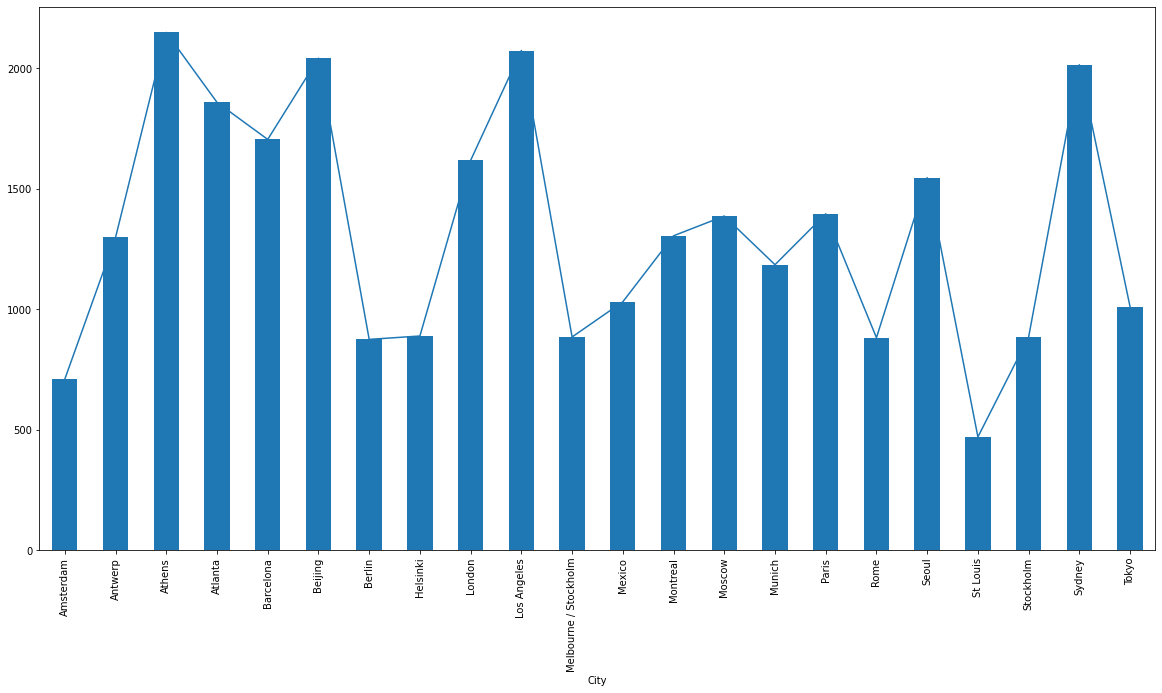

In [53]:
# 6) Используя groupby(), постройте график числа всех медалей выигранных на каждой олимпиаде.

dataframe = df.groupby('City').size()
dataframe.plot(figsize=(20, 10)) #не могу сообразить, как показать все города на оси
dataframe.plot(kind='bar') #если делаю как диаграмму, показывает

In [7]:
# 7) Создайте список показывающий число всех медалей выигранных каждой страной в
# течение всей истории олимпийских игр. Для каждой страны, необходимо показать год
# первой и последней заработанной медали.

#не знаю как это сделать быстрее. Была мысль сделать то же с помощью np.append(), но вроде пишут, что памяти много занимает.
arr = []
for value, group in df.groupby('NOC'):
    arr.append(f'Страна {value}')
    arr.append(f'{group.shape[0]} медаль(-и-ей)')
    arr.append(f'первая в {group.Edition.min()}')
    arr.append(f'последняя в {group.Edition.max()}')
print(arr)

['Страна AFG', '1 медаль(-и-ей)', 'первая в 2008', 'последняя в 2008', 'Страна AHO', '1 медаль(-и-ей)', 'первая в 1988', 'последняя в 1988', 'Страна ALG', '14 медаль(-и-ей)', 'первая в 1984', 'последняя в 2008', 'Страна ANZ', '29 медаль(-и-ей)', 'первая в 1908', 'последняя в 1912', 'Страна ARG', '239 медаль(-и-ей)', 'первая в 1924', 'последняя в 2008', 'Страна ARM', '9 медаль(-и-ей)', 'первая в 1996', 'последняя в 2008', 'Страна AUS', '1075 медаль(-и-ей)', 'первая в 1896', 'последняя в 2008', 'Страна AUT', '146 медаль(-и-ей)', 'первая в 1896', 'последняя в 2008', 'Страна AZE', '16 медаль(-и-ей)', 'первая в 1996', 'последняя в 2008', 'Страна BAH', '23 медаль(-и-ей)', 'первая в 1956', 'последняя в 2008', 'Страна BAR', '1 медаль(-и-ей)', 'первая в 2000', 'последняя в 2000', 'Страна BDI', '1 медаль(-и-ей)', 'первая в 1996', 'последняя в 1996', 'Страна BEL', '408 медаль(-и-ей)', 'первая в 1900', 'последняя в 2008', 'Страна BER', '1 медаль(-и-ей)', 'первая в 1976', 'последняя в 1976', 'Стран

In [18]:
# 8) Атлеты выигравшие медали в Beijing на дистанции 100m или 200m.

dataframe = df[(df.City == 'Beijing') & ((df.Event == '100m') | (df.Event == '200m'))]
dataframe[['Athlete']].style.hide(axis='index')

Athlete
"DIX, Walter"
"BOLT, Usain"
"THOMPSON, Richard"
"FRASER, Shelly-ann"
"SIMPSON, Sherone"
"STEWART, Kerron"
"DIX, Walter"
"BOLT, Usain"
"CRAWFORD, Shawn"
"STEWART, Kerron"


<AxesSubplot:xlabel='Gender'>

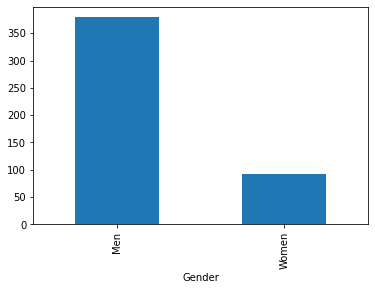

In [33]:
# 9) Постройте график числа золотых медалей выигранных США мужчинами и женщинами в атлетике.

dataframe = df[(df.Medal == 'Gold') & (df.NOC == 'USA') & (df.Sport == 'Athletics')]
dataframe.groupby('Gender').size().plot.bar()

<AxesSubplot:xlabel='Athlete'>

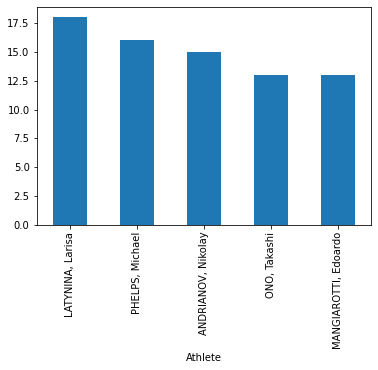

In [41]:
# 10) Постройте график 5 атлетов которые выиграли большинство золотых медалей.

dataframe = df.groupby('Athlete').size().sort_values(ascending=False).head(5)
dataframe.plot.bar()

In [67]:
# 11) Покажите суммарное количество медалей выигранных странами в последних олимпийских играх.

dataframe = df[df.Edition == df.iloc[-1]['Edition']].shape[0]
'Суммарное количество медалей выигранных странами в последних олимпийских играх: {}'.format(dataframe)

'Суммарное количество медалей выигранных странами в последних олимпийских играх: 2042'

In [80]:
# 12) Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов
# США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.

dataframe = df[df.NOC == 'USA']
# два часа ломал голову, в итоге сделал только так, как сделать таблицу не знаю. Буду рад намеку, как это можно реализовать.
for value, group in dataframe.groupby(['Edition']):
    print(group.groupby(['Edition', 'Athlete', 'Discipline']).size().sort_values(ascending=False).head(1))

Edition  Athlete          Discipline
1896     GARRETT, Robert  Athletics     4
dtype: int64
Edition  Athlete         Discipline
1900     BAXTER, Irving  Athletics     5
dtype: int64
Edition  Athlete        Discipline 
1904     EYSER, George  Artistic G.    6
dtype: int64
Edition  Athlete           Discipline
1908     SHERIDAN, Martin  Athletics     3
dtype: int64
Edition  Athlete                Discipline
1912     OSBURN, Carl Townsend  Shooting      4
dtype: int64
Edition  Athlete                 Discipline
1920     SPOONER, Lloyd Spencer  Shooting      7
dtype: int64
Edition  Athlete            Discipline
1924     RICHARDS, Vincent  Tennis        3
dtype: int64
Edition  Athlete                 Discipline
1928     OSIPOWICH, Albina Lucy  Swimming      2
dtype: int64
Edition  Athlete             Discipline
1932     DIDRIKSON, Mildred  Athletics     3
dtype: int64
Edition  Athlete       Discipline
1936     OWENS, Jesse  Athletics     4
dtype: int64
Edition  Athlete                  Disc